<기존 엘만 RNN의 한계>

- 1) 멀리 떨어진 의존성을 잘 감지하지 못함. (멀리 떨어진 정보를 유지하기 어려움)
    - RNN은 타임스텝마다 정보의 유익성에 상관없이 은닉상태 벡터를 업데이트 
    - 결국 RNN은 은닉상태에 어떤값을 유지하고 어떤값을 버릴지 제어하지 못함. 
        - RNN이 선택적으로 업데이트를 결정하거나, 업데이트 시 상태벡터의 어느 부분을 얼마만큼 업데이트할지 판단할 방법 필요 
        
- 2) 그레이디언트가 통제되지 않고 0이나 무한대를 만드는 경향 (불안정한 그레이디언트)
    - "그레이디언트 소실(vanishing gradient)" or "그레이디언트 폭주(exploding gradient)"
    - 절댓값이 아주 크거나 아주 작은 그레이디언트는 최적화 과정을 불안정하게 함. 
        - ReLU 함수, gradient clipping, 적절한 가중치 초기화 등의 방법으로 다룰 수는 있음. 
        - 하지만, 게이팅(gating)이 더 안정적으로 동작 (게이트 네트워크; gated network)

# 게이팅 네트워크

- 게이팅 함수를 사용한 RNN 업데이트 공식

<img src = "KakaoTalk_20230810_140910192.jpg" width=500 height=500>


- 기본 아이디어 
    - 상태 h_t-1 업데이트 하는 데에 "현재 입력이 얼마나 들어가는지"를 게이트 함수가 제어 
    - 게이트 함수는 문맥에 따라 달라짐 
    - 게이트 함수는 보통 "시그모이드"로, 0~1 사이 값 출력 

# LSTM

- 호흐라이터 Hochreiter & 슈미트후버 Schmidhuber (1997)

- 공식 

<img src = "KakaoTalk_20230810_142101013.jpg" width=500 height=500>

- cell state (셀 상태)
    - 1) forget gate layer : 망각 게이트, 삭제 게이트 
        - 조건에 따라 업데이트하는 것 뿐만 아니라, 이전 은닉 상태 h_t-1 값을 의도적으로 지움.
        - 이런 '삭제' 기능은 h_t-1과 또 다른 게이트 함수를 곱해서 수행됨. 
        - 이 함수도 0~1 사이 값 출력하며 현재 입력에 의존 (sigmoid)
        
    - 2) input gate layer : 입력 게이트 
 
<br>

- LSTM 계열 
    - MaLSTM 모델 (Manhattan Distance + LSTM)
        - 코사인 유사도 대신 맨해튼 거리 사용하여 문장 유사도 계산 

# LSTM (Long Short-Term Memory) 구조

<img src = "rnn_lstm.jpg" width=700 height=700>

- 단기 기억을 오래 하기 위해 고안되었음. (장-단기 기억) 

<img src = "lstm.png" width=700 height=700>

- 은닉 상태를 만드는 방법 
    - output gate layer (출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 절편과 함께 다 더해, 활성화 함수를 통과시켜 다음 은닉 상태를 만듦. 
            - 이떄 기본 순환층(SimpleRNN)과는 달리 시그모이드 활성화 함수 사용 
        2. tanh 활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦. 
        
    - LSTM은 순환되는 상태가 2개 
        - 은닉 상태 (hidden state)
        - 셀 상태 (cell state)
            - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값 (순환만 하는 고리)
            - "장기 기억" 이라는 개념을 만들어 주기 위해 

<br>

- 셀 상태를 계산하는 과정
    - forget gate layer (삭제 게이트, 망각 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦. 
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여 
            - 이전 셀 정보를 좀 깎아주는 역할 (망각 게이트)
            
    - input gate layer (입력 게이트)
        - 새로운 정보를 셀 상태에 추가 
        1. 입력과 은닉 상태를 각기 다른 가중치에 곱함 
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과 
        3. 두 결과를 곱함. 
        4. 이전 셀 상태(가 망각 게이트를 통과한 값)과 더함. 
  

# 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size=0.2,
                                                 random_state=4)

# 패딩
train_seq = pad_sequences(x_train, maxlen=100)
val_seq = pad_sequences(x_val, maxlen=100)

print(train_seq.shape, val_seq.shape)

# LSTM 모델 생성 
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

(20000, 100) (5000, 100)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


- LSTM 셀 파라미터 개수 
    - {(8 * 8) + (16 * 8) + 8} * 4 = 800

In [3]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-lstm-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_seq, y_train, epochs=100, batch_size=64,
                   validation_data = (val_seq, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 26ms/step - loss: 0.6929 - accuracy: 0.5324 - val_loss: 0.6926 - val_accuracy: 0.5474
Epoch 2/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6923 - accuracy: 0.5597 - val_loss: 0.6918 - val_accuracy: 0.5832
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6913 - accuracy: 0.5885 - val_loss: 0.6904 - val_accuracy: 0.5988
Epoch 4/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6891 - accuracy: 0.6065 - val_loss: 0.6870 - val_accuracy: 0.6214
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6836 - accuracy: 0.6320 - val_loss: 0.6774 - val_accuracy: 0.6452
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6580 - accuracy: 0.6780 - val_loss: 0.6205 - val_accuracy: 0.6948
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5932 - accuracy: 0.7080 - val_loss: 0.5846 - val_accuracy

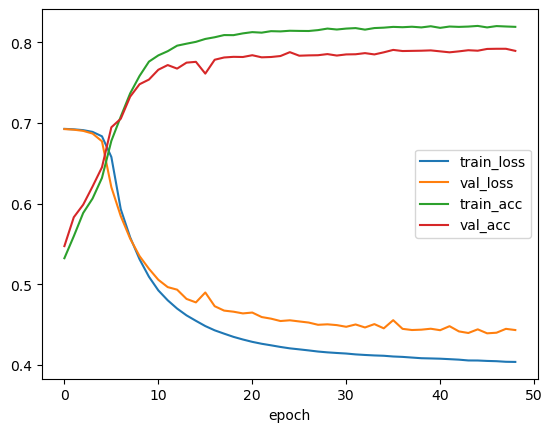

In [4]:
plt.figure()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()

# GRU (Gated Recurrent Unit)

- from 신경 기계번역 창시자 중 1명인 NYU 조경현 교수님의 포닥 연구 (2014)

<img src = "rnn_lstm_gru.png" width=1000 height=1000>

- LSTM을 간소화한 버전 
- LSTM 처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함 
- LSTM 보다 가중치가 적기 때문에, 계산량이 적고 속도 빠름과 동시에 성능은 LSTM과 유사 
    - 데이터 양이 적을 때는 GRU의 성능이 더 좋고, 데이터 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음. 
    - GRU와 LSTM 중 어떤 것이 더 낫다고 말할 수는 없음. 
    
- 은닉상태로 cell state 대체 

<img src = "gru.png" width=700 height=700>

- GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어있음. 
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용 
    
- reset gate (망각 게이트)
    - 셀의 출력(이전 은닉상태)이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행 
    
- update gate (입력 게이트)
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할 

In [5]:
# GRU 모델 생성 
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.GRU(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [7]:
((16 * 8) + (8 * 8) + 8 + 8) * 3

624

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-gru-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, y_train, epochs=100, batch_size=64,
                   validation_data = (val_seq, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6920 - accuracy: 0.5363 - val_loss: 0.6913 - val_accuracy: 0.5544
Epoch 2/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6897 - accuracy: 0.5641 - val_loss: 0.6887 - val_accuracy: 0.5758
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6863 - accuracy: 0.5898 - val_loss: 0.6848 - val_accuracy: 0.5852
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6811 - accuracy: 0.6040 - val_loss: 0.6788 - val_accuracy: 0.6054
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6732 - accuracy: 0.6167 - val_loss: 0.6694 - val_accuracy: 0.6200
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6612 - accuracy: 0.6308 - val_loss: 0.6551 - val_accuracy: 0.6314
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6432 - accuracy: 0.6483 - val_loss: 0.6321 - val_accurac

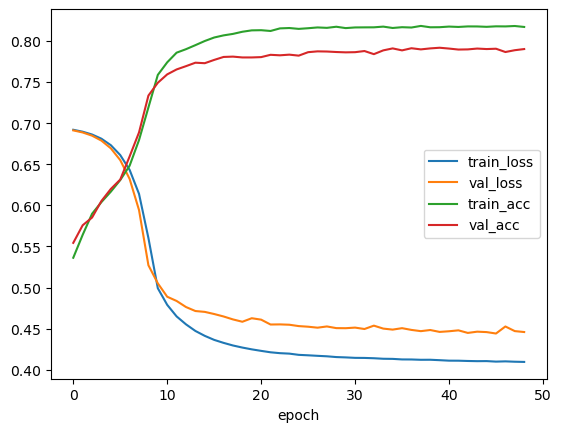

In [9]:
plt.figure()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()

- 원래 GRU가 LSTM 보다 학습 시간은 짧고, 성능은 비슷해야 하는데 지금은 시간 오히려 더 걸리고 성능 비슷 ... 

- 데이터 복잡하고 많으면 보통 LSTM이 더 적절 
- 데이터 간단하고 작으면 보통 GRU가 더 적절 

# <시퀀스 모델 훈련 노하우>

1. 가능하면 게이트 구조 사용 (LSTM or GRU)
2. 가능하면 LSTM 보다 GRU 사용 
    - 훨씬 적은 파라미터, 계산 자원 덜 사용, 비슷한 성능 
3. Adam 옵티마이저 사용 
    - 안정적, 다른 것보다 빨리 수렴 
    - 드물게 수렴 안된다면 SGD 옵티마이저(RMSprop) 사용
4. Gradient Clipping 사용 
    - 훈련 과정의 그레이디언트 값 그래프 시각화 --> 범위 가늠한 후 --> 이상치 클리핑 
        - 이렇게 훈련 과정 안정화 가능 
    - clip_grad_norm() 함수 사용 (in 파이토치) 
        - optimizers.SGD(lr=.01, clipnorm=1.) (in 텐서플로우)
    - 일반적으로 항상 그레이디언트 클리핑하는 습관을 들여야함. 
5. 조기 종료 사용 (EarlyStopping)
    - 시퀀스 모델은 과대적합되기 쉬움.

# 1) 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능 제공 
    - SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음. 
        - dropout : 셀의 "입력"에 드롭아웃 적용 
        - recurrent_dropout : 순환되는 "은닉상태"에 드롭아웃 적용 
            - 버전에 따라 recurrent_dropout이 GPU를 사용하지 못하는 버그가 있음. 
- 과대적합 방지 & 훈련 시간 좀 더 길어짐. --> 성능 소량 상승 기대
- 드롭아웃 정도가 너무 심하면 오히려 역효과가 나기도 하는데, 보통 드롭아웃 거의 항상 사용

In [4]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-dropout-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model3.fit(train_seq, y_train, epochs=100, batch_size=64,
                   validation_data = (val_seq, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 29ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6926 - val_accuracy: 0.5436
Epoch 2/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6923 - accuracy: 0.5487 - val_loss: 0.6918 - val_accuracy: 0.5622
Epoch 3/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6912 - accuracy: 0.5711 - val_loss: 0.6903 - val_accuracy: 0.5864
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6892 - accuracy: 0.5860 - val_loss: 0.6877 - val_accuracy: 0.6000
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6857 - accuracy: 0.6026 - val_loss: 0.6829 - val_accuracy: 0.6164
Epoch 6/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6794 - accuracy: 0.6181 - val_loss: 0.6739 - val_accuracy: 0.6340
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6668 - accuracy: 0.6405 - val_loss: 0.6557 - val_accura

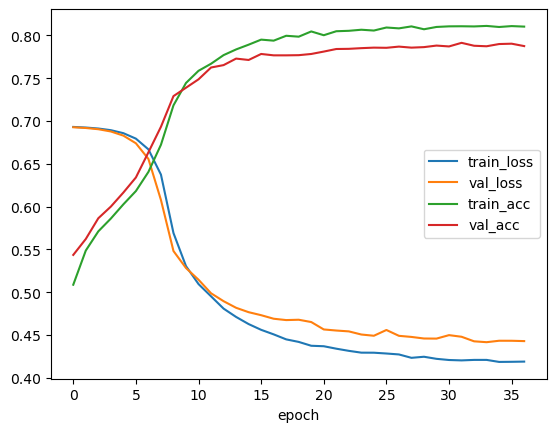

In [6]:
plt.figure()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()

# 드롭아웃 넣어서 과대적합이 방지됨 (val_acc와 acc 간의 차이가 아주 약간 줄어듦...)
# 0.8187 - val_loss: 0.4392 - val_accuracy: 0.7920 --> dropout 미사용 (0.0267)
# 0.8109 - val_loss: 0.4417 - val_accuracy: 0.7872 --> dropout 사용 (0.0237)

# 2) 모델 복잡화 - 2개의 LSTM층 연결 

- 순환층을 연결할 때의 주의점 
    - 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달 
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함.
        - 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야함. 
            - return_sequences 매개변수를 True 지정 

In [7]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.LSTM(8, dropout=.3, return_sequences=True))
model4.add(keras.layers.LSTM(8, dropout=.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

# lstm_3 층의 param # 계산 공식 
# (8*8 + 8*8 + 8) * 4 = 544

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


- 첫 번째 LSTM
    - 모든 타임스텝(100개)의 은닉상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
- 두 번째 LSTM
    - 마지막 타임스텝의 은닉상태만 출력하기 때문에 출력의 크기가 (None, 8)

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-2rnn-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model4.fit(train_seq, y_train, epochs=100, batch_size=64,
                   validation_data = (val_seq, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb])

# 원래 모델 층을 더 쌓으면 성능이 더 좋아져야 하는데, 지금은 예외적으로 더 안좋아진 모습... ㅎ

Epoch 1/100
313/313 [==============================] - 21s 55ms/step - loss: 0.6929 - accuracy: 0.5173 - val_loss: 0.6922 - val_accuracy: 0.5862
Epoch 2/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6911 - accuracy: 0.5853 - val_loss: 0.6888 - val_accuracy: 0.6282
Epoch 3/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6827 - accuracy: 0.6205 - val_loss: 0.6691 - val_accuracy: 0.6714
Epoch 4/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6263 - accuracy: 0.6870 - val_loss: 0.5844 - val_accuracy: 0.7052
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5631 - accuracy: 0.7217 - val_loss: 0.5542 - val_accuracy: 0.7204
Epoch 6/100
313/313 [==============================] - 19s 62ms/step - loss: 0.5342 - accuracy: 0.7411 - val_loss: 0.5354 - val_accuracy: 0.7366
Epoch 7/100
313/313 [==============================] - 27s 86ms/step - loss: 0.5111 - accuracy: 0.7560 - val_loss: 0.5188 - val_ac

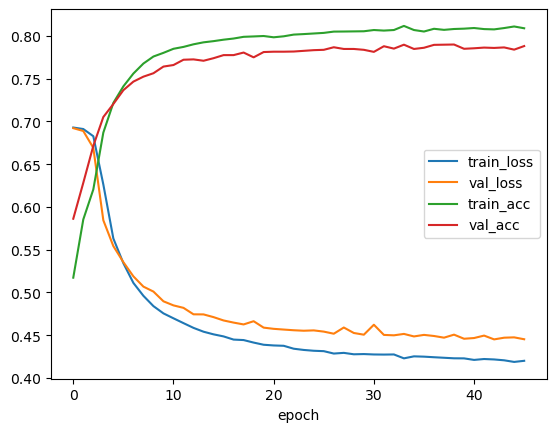

In [9]:
plt.figure()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.xlabel('epoch')
plt.legend()

plt.show()

# best model 검증 

In [11]:
test_seq = pad_sequences(x_test, maxlen=100)
rnn_model = keras.models.load_model('./model/best-dropout-model.h5')
# val_loss: 0.4417 - val_accuracy: 0.7872

rnn_model.evaluate(test_seq, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.4305 - accuracy: 0.8016


[0.4305298328399658, 0.8015599846839905]

In [14]:
rnn_model.predict(test_seq)

782/782 [==============================] - 5s 7ms/step


array([[0.28417912],
       [0.5099176 ],
       [0.4426519 ],
       ...,
       [0.10374231],
       [0.06040431],
       [0.6570747 ]], dtype=float32)